# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:

from utils import get_dataset
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np
import cv2

In [5]:
dataset = get_dataset("/app/project/data/processed/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/processed/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/processed/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 300
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [24]:
dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

In [31]:
def display_instances(batch, save_num):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    colormap = {1: [0, 1, 0], 2: [0, 0, 1], 4: [1, 0, 0]}
    textmap = {1: "vehicle", 2: "pedestrian", 4: "cyclist"}
         
    fig, ax = plt.subplots(1)

    img = Image.fromarray(batch["image"].numpy())
    ax.imshow(img)
    
    nums = [0, 0, 0, 0, 0]
    
    bboxes = batch["groundtruth_boxes"].numpy()
    classes = batch["groundtruth_classes"].numpy()
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = (bb * 640).astype(np.int32)
        nums[cl] += 1
        rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none',edgecolor=colormap[cl])
        plt.text(x1, y1-2, textmap[cl],color=colormap[cl])
        ax.add_patch(rec)
    plt.savefig("img{}.JPEG".format(save_num))
    plt.tight_layout()    
    plt.show()
    
    return nums[1], nums[2], nums[4]
    
    



## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

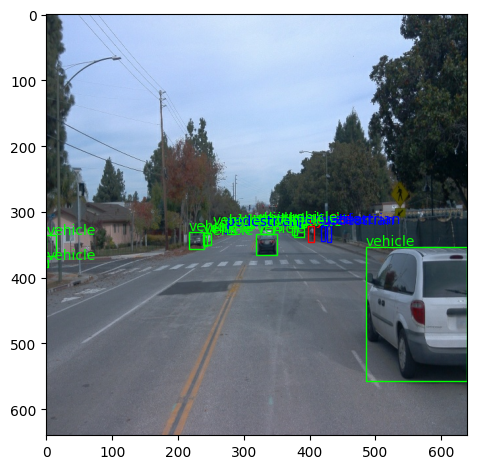

<Figure size 640x480 with 0 Axes>

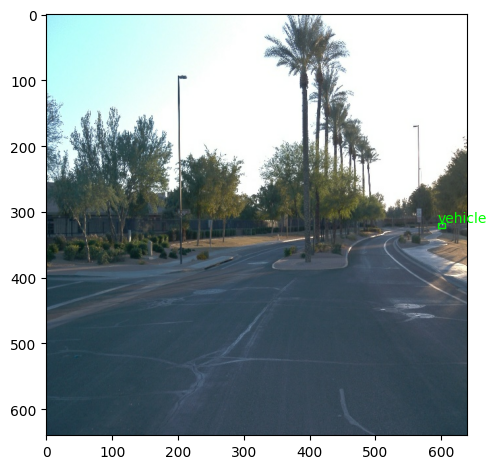

<Figure size 640x480 with 0 Axes>

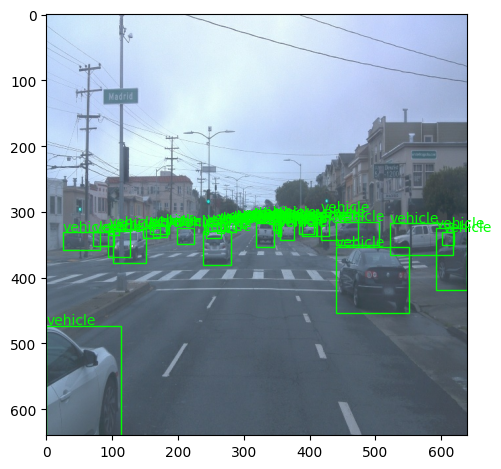

<Figure size 640x480 with 0 Axes>

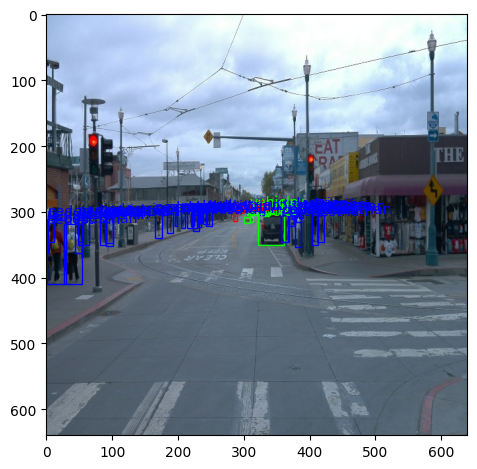

<Figure size 640x480 with 0 Axes>

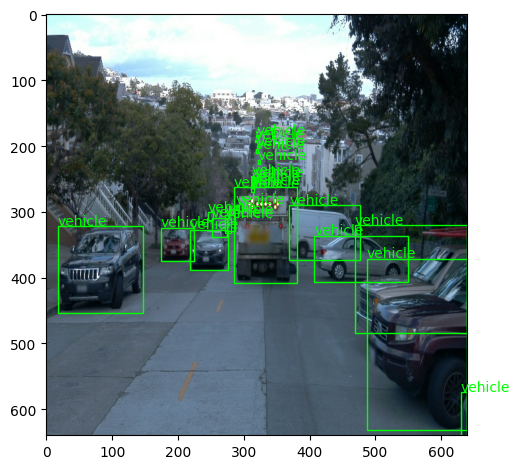

<Figure size 640x480 with 0 Axes>

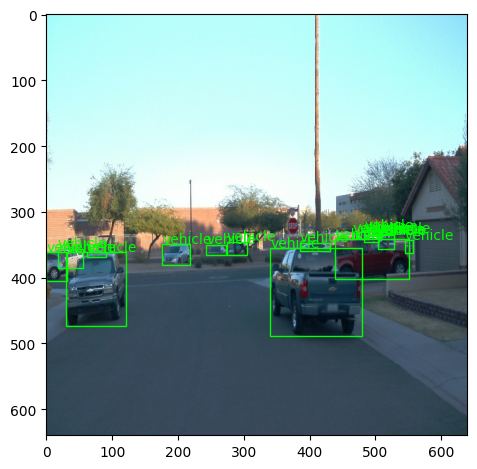

<Figure size 640x480 with 0 Axes>

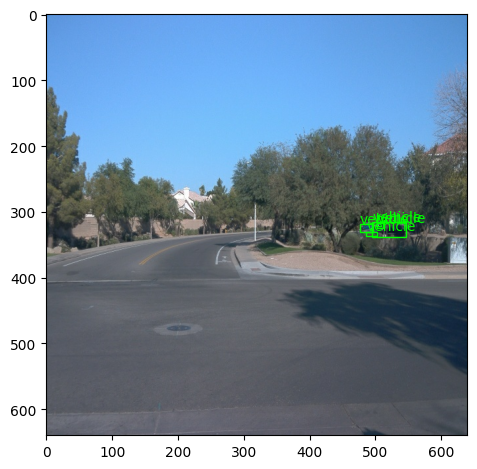

<Figure size 640x480 with 0 Axes>

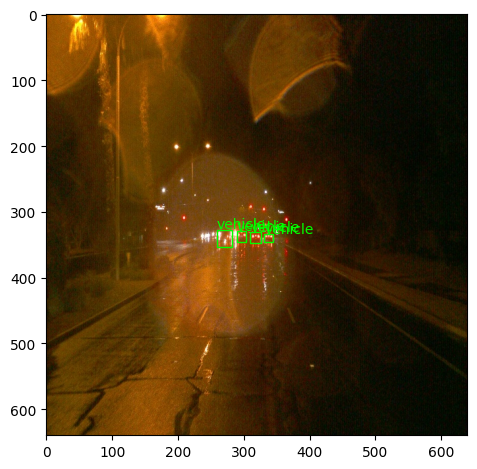

<Figure size 640x480 with 0 Axes>

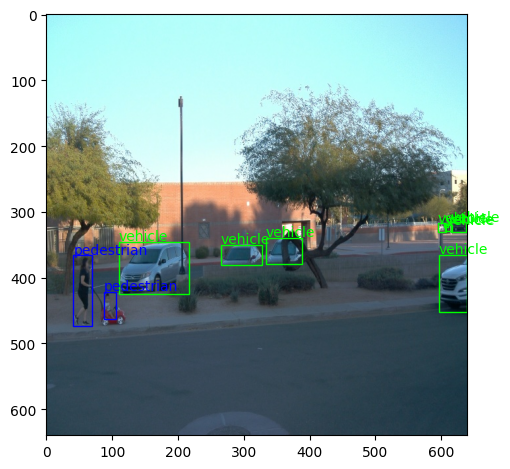

<Figure size 640x480 with 0 Axes>

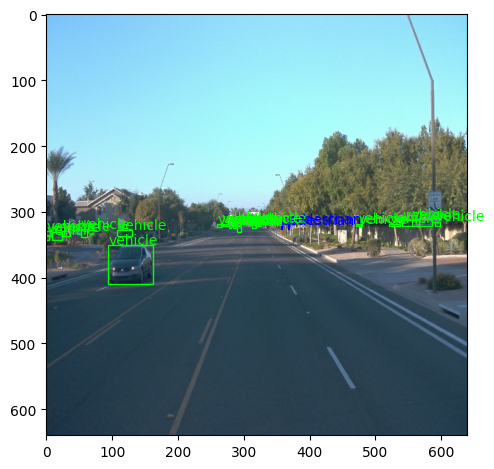

157 44 2


<Figure size 640x480 with 0 Axes>

In [37]:
%matplotlib inline

## STUDENT SOLUTION HERE
dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
dataset10 = dataset.take(10)
cnt = 0
vehicle_num, pedestrian_num, cyclist_num = 0, 0, 0
for data in dataset10:
    val1, val2, val3 = display_instances(data, cnt)
    vehicle_num += val1
    pedestrian_num += val2
    cyclist_num += val3
    cnt += 1
print(vehicle_num, pedestrian_num, cyclist_num)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

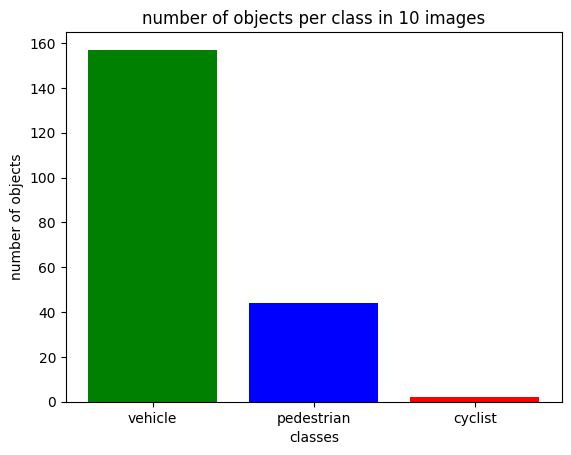

In [38]:
%matplotlib inline
x = np.arange(3)
classes = ["vehicle", "pedestrian", "cyclist"]
y = [vehicle_num, pedestrian_num, cyclist_num]

plt.bar(x, y, color=['g', 'b', 'r'])
plt.xticks(x, classes)
plt.xlabel('classes')
plt.ylabel('number of objects')
plt.title("number of objects per class in 10 images")
plt.show()